# Sport Vouchers Program Analysis

The goal of this Portfolio task is to explore data from the Federal Government Sport Vouchers program - this is a
program that provides up to two $100 vouchers for kids to participate in organised sport. Here's the [NSW Active Kids page](https://www.service.nsw.gov.au/transaction/apply-active-kids-voucher), there are similar schemes in other states - this data is from South Australia.

This is an exercise in exploring data and communicating the insights you can gain from it.  The source data comes
from the `data.gov.au` website and provides details of all Sport Vouchers that have been redeemed since February  in SA 2015 as part of the Sport Voucher program:  [Sports Vouchers Data](https://data.gov.au/dataset/ds-sa-14daba50-04ff-46c6-8468-9fa593b9f100/details).  This download is provided for you as `sportsvouchersclaimed.csv`.

To augment this data you can also make use of [ABS SEIFA data by LGA](http://stat.data.abs.gov.au/Index.aspx?DataSetCode=ABS_SEIFA_LGA#) which shows a few measures of Socioeconomic Advantage and Disadvantage for every Local Government Area. This data is provided for you as `ABS_SEIFA_LGA.csv`. This could enable you to answer questions about whether the voucher program is used equally by parents in low, middle and high socioeconomic areas.   You might be interested in this if you were concerned that this kind of program might just benifit parents who are already advantaged (they might already be paying for sport so this program wouldn't be helping much).

Questions:
* Describe the distribution of vouchers by: LGA, Sport - which regions/sports stand out? 
* Are some sports more popular in different parts of the state?
* Are any LGAs over/under represented in their use of vouchers?
* Is there a relationship between any of the SEIFA measures and voucher use in an LGA?

A challenge in this task is to display a useful summary of the data given that there are a large number of LGAs and sports involved.  Try to avoid long lists and large tables. Think about what plots and tables communicate the main points of your findings. 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#set a function to describe data
def de(data):
    des=data.describe()
    return des

In [4]:
# read the sports vouchers data
sa_vouchers = pd.read_csv("sportsvouchersclaimed.csv")
sa_vouchers.head()

,Participant_ID,Participant_Suburb,Club_Previous_Member,Participant_ATSI_Indicator,Participant_CALD_Indicator,Participant_Sex,Voucher_Value,Club_Name,Voucher_Sport,Participant_LGA,Participant_Electorate,Voucher_Completion_Date,Voucher_Claim_Year
0,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,26/6/15 1:19,2015
1,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,29/6/16 23:55,2016
2,1000004,ABERFOYLE PARK,Not Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,21/4/16 3:37,2016
3,1000004,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,30/3/17 0:47,2017
4,1000005,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Blackwood Community Recreation Association,Gymnastics,ONKAPARINGA,FISHER,20/7/15 2:50,2015


The SEIFA data includes row for each Local Government Area (LGA) but the names of the LGAs have a letter or letters in brackets after the name.  To allow us to match this up with the voucher data we remove this and convert to uppercase. 

For each LGA the data includes a number of measures all of which could be useful in your exploration.  

In [5]:
# read the SEIFA data, create an LGA column by removing the letters in brackets and converting to uppercase
seifa = pd.read_csv('ABS_SEIFA_LGA.csv')
lga = seifa["Local Government Areas - 2011"].str.replace(' \([ACSRCDMT]+\)', '').str.upper()
seifa['LGA'] = lga
seifa.head()

<ipython-input-5-b1ee4bfe672a>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  lga = seifa["Local Government Areas - 2011"].str.replace(' \([ACSRCDMT]+\)', '').str.upper()


,LGA_2011,Local Government Areas - 2011,INDEX_TYPE,Index Type,MEASURE,Measure,Value,LGA
0,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,967,ALBURY
1,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,MINS,Minimum score for SA1s in area,628,ALBURY
2,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,MAXS,Maximum score for SA1s in area,1169,ALBURY
3,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,URP,Usual resident population,47851,ALBURY
4,10110,Armidale Dumaresq (A),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,985,ARMIDALE DUMARESQ


Since there are many rows per LGA we need to use `pivot_table` to create a new data frame with one row per LGA. Here
is an example of doing this to create a table with the different SCORE measures and the population (URP) field. 

In [6]:
LGA_scores = seifa[seifa.MEASURE == 'SCORE'].pivot_table(index="LGA", columns=["INDEX_TYPE"], values="Value")
LGA_scores.head()
LGA_pop = seifa[seifa.MEASURE == 'URP'].pivot_table(index="LGA", columns=["INDEX_TYPE"], values="Value")
LGA_scores['Population'] = LGA_pop.IEO
LGA_scores.head()

INDEX_TYPE,IEO,IER,IRSAD,IRSD,Population
LGA,,,,,
ADELAIDE,874.0,874.0,1036.0,1013.0,19606.0
ADELAIDE HILLS,1083.0,1083.0,1077.0,1081.0,38601.0
ALBANY,999.0,999.0,977.0,987.0,33614.0
ALBURY,964.0,964.0,967.0,979.0,47851.0
ALEXANDRINA,1000.0,1000.0,969.0,987.0,23693.0


This data frame can then be joined with the vouchers data fram to create one master data frame containing both the voucher data and the SEIFA measures.

In [7]:
sa_vouchers_scores = sa_vouchers.join(LGA_scores, on='Participant_LGA')
sa_vouchers_scores.head()

,Participant_ID,Participant_Suburb,Club_Previous_Member,Participant_ATSI_Indicator,Participant_CALD_Indicator,Participant_Sex,Voucher_Value,Club_Name,Voucher_Sport,Participant_LGA,Participant_Electorate,Voucher_Completion_Date,Voucher_Claim_Year,IEO,IER,IRSAD,IRSD,Population
0,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,26/6/15 1:19,2015,996.0,996.0,975.0,993.0,159517.0
1,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,29/6/16 23:55,2016,996.0,996.0,975.0,993.0,159517.0
2,1000004,ABERFOYLE PARK,Not Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,21/4/16 3:37,2016,996.0,996.0,975.0,993.0,159517.0
3,1000004,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,30/3/17 0:47,2017,996.0,996.0,975.0,993.0,159517.0
4,1000005,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Blackwood Community Recreation Association,Gymnastics,ONKAPARINGA,FISHER,20/7/15 2:50,2015,996.0,996.0,975.0,993.0,159517.0


## `- Describe the distribution of vouchers by: LGA, Sport - which regions/sports stand out?`

In [8]:

sa_vouchers_scores['Voucher_Sport']=sa_vouchers_scores['Voucher_Sport'].astype('category')
sa_vouchers_scores['Voucher_Sport']

0         Australian Rules
1         Australian Rules
2               Gymnastics
3               Gymnastics
4               Gymnastics
                ...       
127521             Netball
127522             Netball
127523             Netball
127524             Netball
127525             Netball
Name: Voucher_Sport, Length: 127526, dtype: category
Categories (50, object): ['Archery', 'Athletics', 'Australian Rules', 'BMX', ..., 'Volleyball', 'Water Polo', 'Weightlifting', 'Wrestling']

In [9]:
set(sa_vouchers_scores.Participant_LGA)

{'ADELAIDE',
 'ADELAIDE HILLS',
 'ADELAIDE PLAINS',
 'ALEXANDRINA',
 'BAROSSA',
 'BARUNGA WEST',
 'BERRI BARMERA',
 'BURNSIDE',
 'CAMPBELLTOWN',
 'CEDUNA',
 'CHARLES STURT',
 'CLARE AND GILBERT VALLEYS',
 'CLEVE',
 'COOBER PEDY',
 'COPPER COAST',
 'ELLISTON',
 'FLINDERS RANGES',
 'FRANKLIN HARBOUR',
 'GAWLER',
 'GOYDER',
 'GRANT',
 'HOLDFAST BAY',
 'KANGAROO ISLAND',
 'KAROONDA EAST MURRAY',
 'KIMBA',
 'KINGSTON',
 'LIGHT',
 'LOWER EYRE PENINSULA',
 'LOXTON WAIKERIE',
 'MARION',
 'MID MURRAY',
 'MITCHAM',
 'MOUNT BARKER',
 'MOUNT GAMBIER',
 'MOUNT REMARKABLE',
 'MURRAY BRIDGE',
 'NARACOORTE LUCINDALE',
 'NO LGA',
 'NORTHERN AREAS',
 'NORWOOD PAYNEHAM AND ST PETERS',
 'ONKAPARINGA',
 'ORROROO/CARRIETON',
 'PETERBOROUGH',
 'PLAYFORD',
 'PORT ADELAIDE ENFIELD',
 'PORT AUGUSTA',
 'PORT LINCOLN',
 'PORT PIRIE',
 'PROSPECT',
 'RENMARK PARINGA',
 'ROBE',
 'ROXBY DOWNS',
 'SALISBURY',
 'SOUTHERN MALLEE',
 'STREAKY BAY',
 'TATIARA',
 'TEA TREE GULLY',
 'THE COORONG',
 'TUMBY BAY',
 'UNLEY',
 'V

In [10]:
de(sa_vouchers_scores['Population'])

count    118066.000000
mean      68014.296046
std       50470.140017
min         871.000000
25%       22070.000000
50%       62912.000000
75%      104922.000000
max      159517.000000
Name: Population, dtype: float64

In [11]:
#Create the datafram about local Participant_LGA,Participant_Electorate,Voucher_Sport
new_chart=sa_vouchers_scores[['Participant_LGA','Participant_Electorate','Voucher_Sport','Population']]

In [12]:
new_chart.head()

,Participant_LGA,Participant_Electorate,Voucher_Sport,Population
0,ONKAPARINGA,FISHER,Australian Rules,159517.0
1,ONKAPARINGA,FISHER,Australian Rules,159517.0
2,ONKAPARINGA,FISHER,Gymnastics,159517.0
3,ONKAPARINGA,FISHER,Gymnastics,159517.0
4,ONKAPARINGA,FISHER,Gymnastics,159517.0


In [13]:
de(new_chart['Participant_LGA'])

count          127526
unique             69
top       ONKAPARINGA
freq            12782
Name: Participant_LGA, dtype: object

In [14]:
de(new_chart['Participant_Electorate'])

count     127526
unique        48
top       HEYSEN
freq        6066
Name: Participant_Electorate, dtype: object

In [15]:
de(new_chart['Voucher_Sport'])

count               127526
unique                  50
top       Australian Rules
freq                 47224
Name: Voucher_Sport, dtype: object

### -- From the describe table we can see local government area of *ONKAPARINGA* has a highest participant numbers 
### -- The most popular sport is *Australian Rules*
### -- The most peopler elctorated by *HEYSEN*


<AxesSubplot:xlabel='count', ylabel='Participant_LGA'>

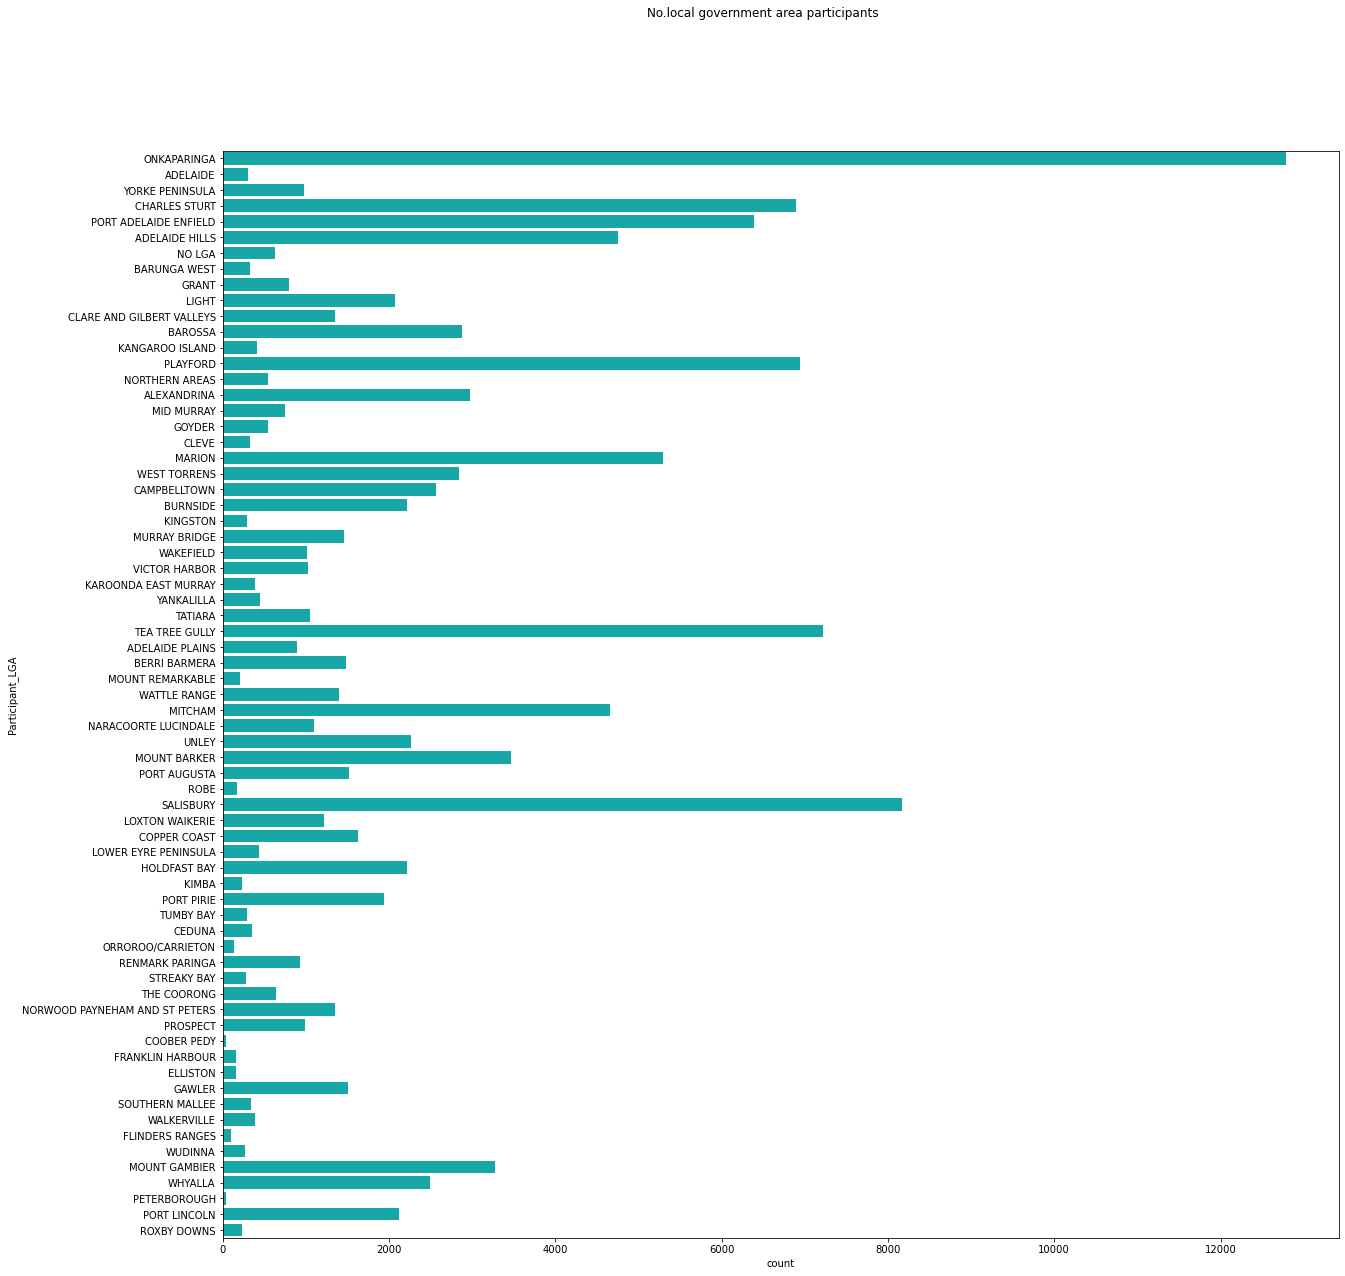

In [16]:
#crate the tables of local government area participanted 
f, ax = plt.subplots(figsize=(20, 20))
f.suptitle('No.local government area participants')
sns.countplot(y='Participant_LGA', data=new_chart, color="c")


In [17]:
print(new_chart['Participant_LGA'].value_counts())

ONKAPARINGA          12782
SALISBURY             8169
TEA TREE GULLY        7219
PLAYFORD              6940
CHARLES STURT         6897
                     ...  
FRANKLIN HARBOUR       155
ORROROO/CARRIETON      137
FLINDERS RANGES        102
PETERBOROUGH            45
COOBER PEDY             39
Name: Participant_LGA, Length: 69, dtype: int64


In [49]:
new_chart['Voucher_used'] = new_chart.groupby('Participant_LGA')['Participant_LGA'].transform('count')

<ipython-input-49-7f013c75596d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_chart['Voucher_used'] = new_chart.groupby('Participant_LGA')['Participant_LGA'].transform('count')


In [50]:
new_chart

,Participant_LGA,Participant_Electorate,Voucher_Sport,Population,Voucher_used
0,ONKAPARINGA,FISHER,Australian Rules,159517.0,12782
1,ONKAPARINGA,FISHER,Australian Rules,159517.0,12782
2,ONKAPARINGA,FISHER,Gymnastics,159517.0,12782
3,ONKAPARINGA,FISHER,Gymnastics,159517.0,12782
4,ONKAPARINGA,FISHER,Gymnastics,159517.0,12782
...,...,...,...,...,...
127521,MID MURRAY,SCHUBERT,Netball,8134.0,751
127522,MID MURRAY,SCHUBERT,Netball,8134.0,751
127523,MID MURRAY,SCHUBERT,Netball,8134.0,751
127524,MID MURRAY,SCHUBERT,Netball,8134.0,751


In [83]:
# set the percentage of voucher used 
new_chart['Voucher_used%']=(new_chart['Voucher_used']/sa_vouchers_scores['Population'])*100

<ipython-input-83-48bb9bebdc9f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_chart['Voucher_used%']=(new_chart['Voucher_used']/sa_vouchers_scores['Population'])*100


In [59]:
new_chart

,Participant_LGA,Participant_Electorate,Voucher_Sport,Population,Voucher_used,Voucher_used%
0,ONKAPARINGA,FISHER,Australian Rules,159517.0,12782,8.012939
1,ONKAPARINGA,FISHER,Australian Rules,159517.0,12782,8.012939
2,ONKAPARINGA,FISHER,Gymnastics,159517.0,12782,8.012939
3,ONKAPARINGA,FISHER,Gymnastics,159517.0,12782,8.012939
4,ONKAPARINGA,FISHER,Gymnastics,159517.0,12782,8.012939
...,...,...,...,...,...,...
127521,MID MURRAY,SCHUBERT,Netball,8134.0,751,9.232850
127522,MID MURRAY,SCHUBERT,Netball,8134.0,751,9.232850
127523,MID MURRAY,SCHUBERT,Netball,8134.0,751,9.232850
127524,MID MURRAY,SCHUBERT,Netball,8134.0,751,9.232850


Text(0.5, 1.0, 'SA Activity')

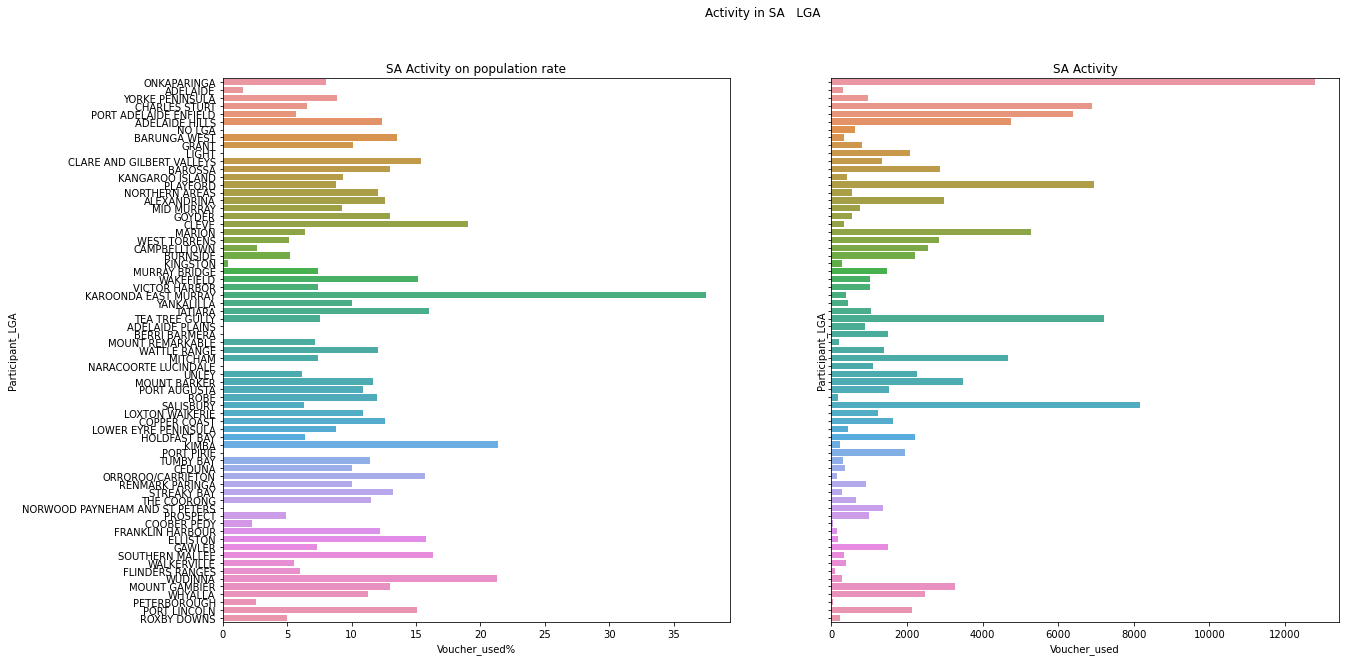

In [78]:
###bx = plt.subplots(figsize = (20,20))
##bx=sns.barplot(y='Participant_LGA',x='Voucher_used%',data=new_chart)
fig, axes = plt.subplots(1, 2, sharey=True,figsize=(20,10))
fig.suptitle('Activity in SA   LGA')
sns.barplot(ax=axes[0],data=new_chart,x='Voucher_used%',y='Participant_LGA')
axes[0].set_title('SA Activity on population rate')
sns.barplot(ax=axes[1],data=new_chart,x='Voucher_used', y='Participant_LGA')
axes[1].set_title('SA Activity' )
##sns.barplot(ax=axes[3],data=new_chart,x='Population',y='Participant_LGA')
##axes[3].set_title('SA population')

### --- In ONKAPARINGA they have higher number of sport vouchers participanted but the percentage of voucher used is not big , compared to KAROONDA EAST MURRY where has low population but have higher percentage of voucher used 


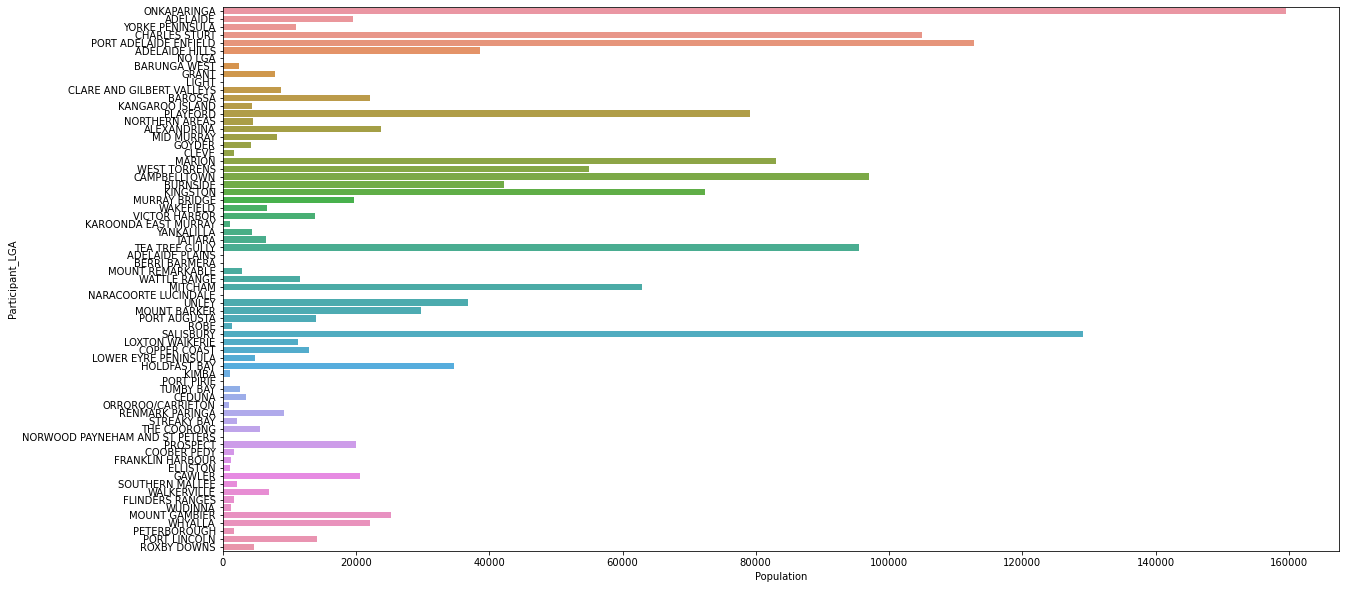

In [82]:
bx = plt.subplots(figsize = (20,10))
bx=sns.barplot(data=new_chart,x='Population',y='Participant_LGA')

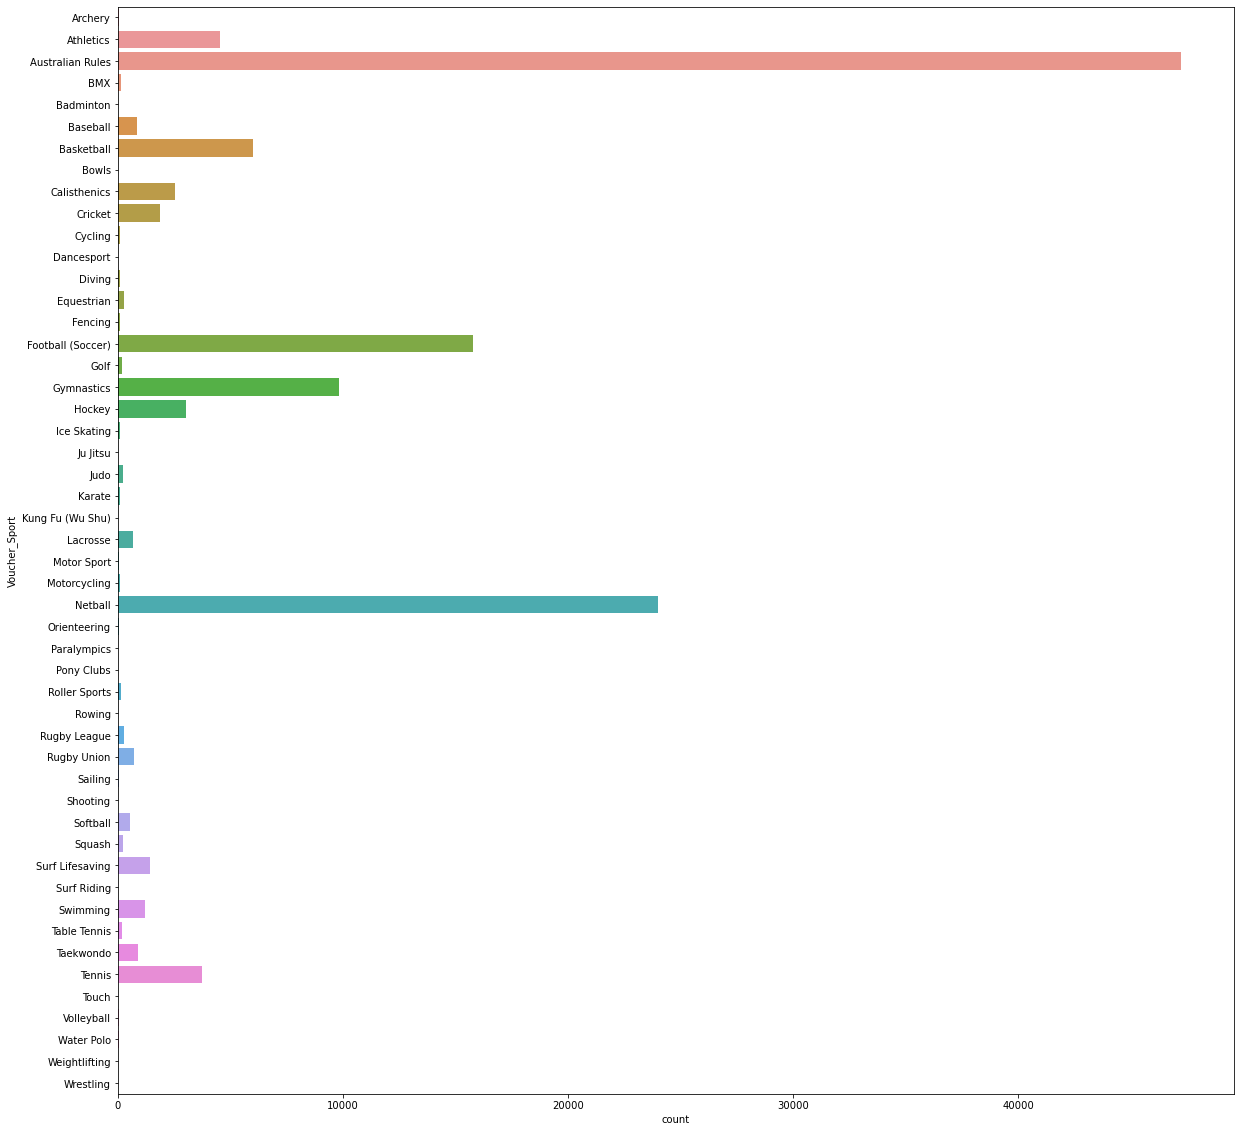

In [60]:
#crate the bars shows types of sports participanted and numbers 
ax = plt.subplots(figsize = (20,20))
ax =sns.countplot(y= 'Voucher_Sport', data=new_chart)


In [90]:
sa_vouchers_scores.groupby(['Voucher_Sport']).size()


Voucher_Sport
Archery                 34
Athletics             4518
Australian Rules     47224
BMX                    157
Badminton                4
Baseball               865
Basketball            6016
Bowls                    2
Calisthenics          2522
Cricket               1875
Cycling                105
Dancesport               2
Diving                  89
Equestrian             265
Fencing                 84
Football (Soccer)    15775
Golf                   188
Gymnastics            9823
Hockey                3026
Ice Skating             86
Ju Jitsu                22
Judo                   210
Karate                  91
Kung Fu (Wu Shu)         2
Lacrosse               656
Motor Sport             45
Motorcycling            97
Netball              24017
Orienteering            56
Paralympics              3
Pony Clubs              17
Roller Sports          148
Rowing                  22
Rugby League           270
Rugby Union            734
Sailing                 40
Shooting      

## `- Are some sports more popular in different parts of the state?`

### -- Yes

In [20]:
new_chart.head()

,Participant_LGA,Participant_Electorate,Voucher_Sport,Population
0,ONKAPARINGA,FISHER,Australian Rules,159517.0
1,ONKAPARINGA,FISHER,Australian Rules,159517.0
2,ONKAPARINGA,FISHER,Gymnastics,159517.0
3,ONKAPARINGA,FISHER,Gymnastics,159517.0
4,ONKAPARINGA,FISHER,Gymnastics,159517.0


In [21]:
# m=new_chart['Voucher_Sport'].value_counts()
pd.crosstab(new_chart['Voucher_Sport'], new_chart['Participant_LGA'],margins=True,margins_name='total')
#sns.heatmap(pd.crosstab(pd.crosstab(new_chart['Voucher_Sport'], new_chart['Participant_LGA'])),
            #cmap="YlGnBu", annot=True, cbar=False)

Participant_LGA,ADELAIDE,ADELAIDE HILLS,ADELAIDE PLAINS,ALEXANDRINA,BAROSSA,BARUNGA WEST,BERRI BARMERA,BURNSIDE,CAMPBELLTOWN,CEDUNA,...,VICTOR HARBOR,WAKEFIELD,WALKERVILLE,WATTLE RANGE,WEST TORRENS,WHYALLA,WUDINNA,YANKALILLA,YORKE PENINSULA,total
Voucher_Sport,,,,,,,,,,,,,,,,,,,,,
Archery,0,3,0,9,0,0,0,2,0,0,...,8,0,0,0,1,0,0,3,0,34
Athletics,16,204,3,62,158,1,10,203,162,14,...,39,30,20,86,114,15,29,10,30,4518
Australian Rules,130,1412,485,980,1196,86,545,747,1186,211,...,368,402,146,652,907,569,44,214,309,47224
BMX,0,2,0,4,3,0,0,0,0,1,...,0,2,0,0,2,0,0,0,0,157
Badminton,0,0,0,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,4
Baseball,1,11,3,0,6,0,13,38,11,0,...,0,0,0,20,12,0,0,0,0,865
Basketball,4,48,15,204,341,12,18,36,40,0,...,129,61,6,85,70,605,0,1,87,6016
Bowls,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
Calisthenics,1,62,23,5,9,0,0,14,26,0,...,1,12,4,7,45,15,0,0,0,2522


<AxesSubplot:xlabel='Voucher_Sport'>

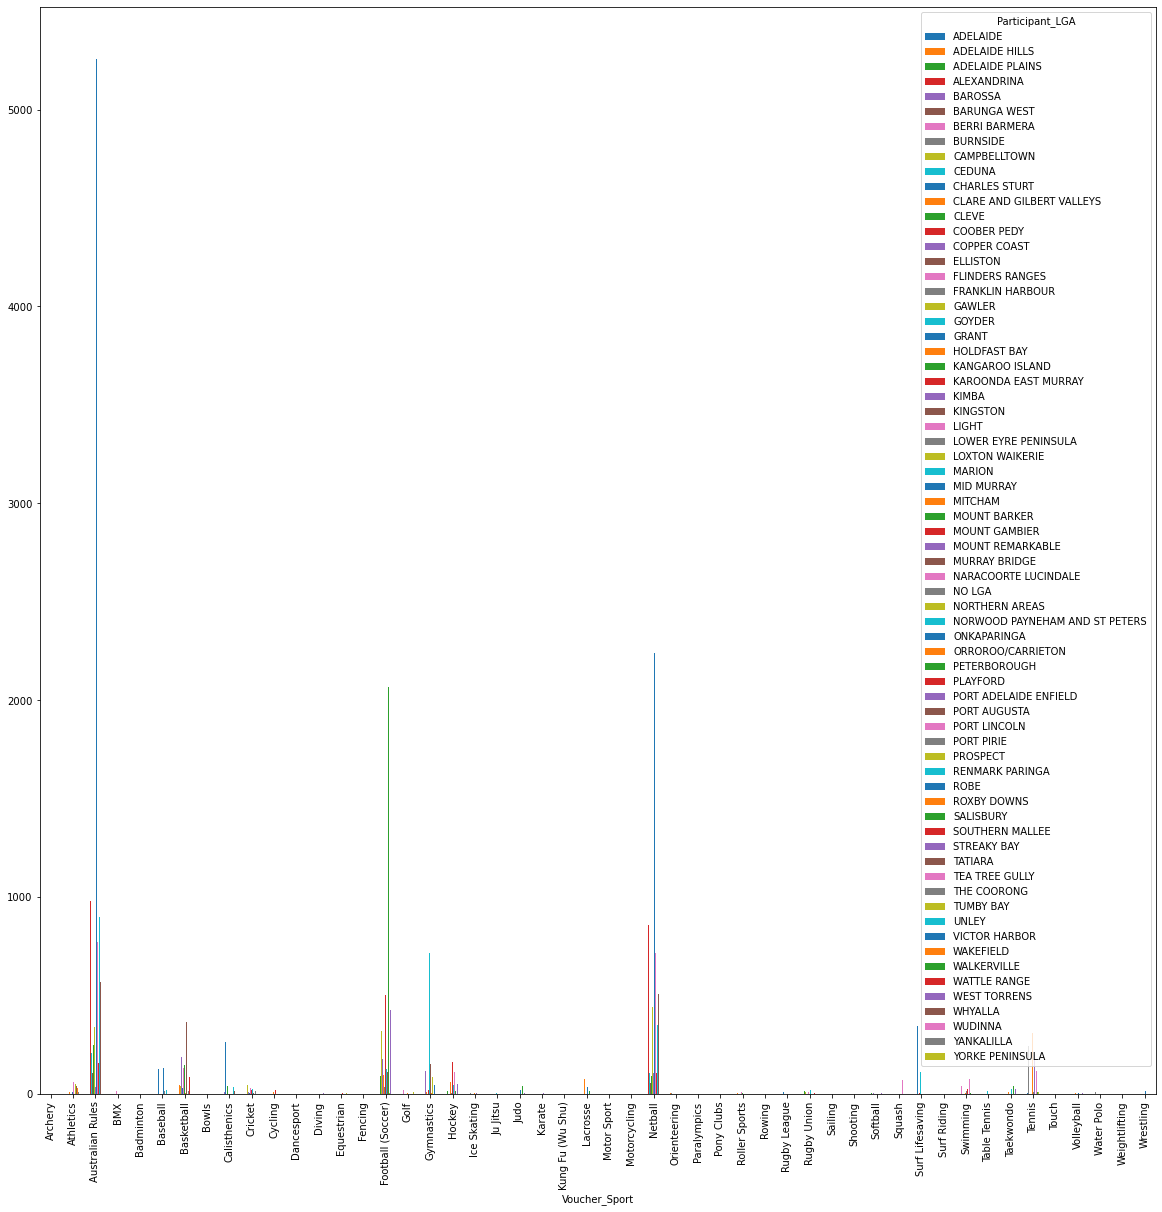

In [22]:
pd.crosstab(new_chart['Voucher_Sport'], new_chart['Participant_LGA']).plot(kind='bar',figsize = (20,20))

In [23]:
pd.crosstab(new_chart['Voucher_Sport']=='Australian Rules', new_chart['Participant_LGA'],margins=True,margins_name='total')

Participant_LGA,ADELAIDE,ADELAIDE HILLS,ADELAIDE PLAINS,ALEXANDRINA,BAROSSA,BARUNGA WEST,BERRI BARMERA,BURNSIDE,CAMPBELLTOWN,CEDUNA,...,VICTOR HARBOR,WAKEFIELD,WALKERVILLE,WATTLE RANGE,WEST TORRENS,WHYALLA,WUDINNA,YANKALILLA,YORKE PENINSULA,total
Voucher_Sport,,,,,,,,,,,,,,,,,,,,,
False,172,3344,414,1999,1678,247,941,1466,1381,139,...,660,608,240,746,1937,1919,223,229,668,80302
True,130,1412,485,980,1196,86,545,747,1186,211,...,368,402,146,652,907,569,44,214,309,47224
total,302,4756,899,2979,2874,333,1486,2213,2567,350,...,1028,1010,386,1398,2844,2488,267,443,977,127526


### - -  Accroding to this graph , we can see the top three sports are Australia Rules ,Football(soccer) and Netball
### -- For Australia Rules in ADELAIDE HILLS has the most participanted numbers

In [24]:
m=pd.crosstab(new_chart['Voucher_Sport'], new_chart['Participant_LGA'])

array([[<AxesSubplot:xlabel='Voucher_Sport'>,
        <AxesSubplot:xlabel='Voucher_Sport'>,
        <AxesSubplot:xlabel='Voucher_Sport'>,
        <AxesSubplot:xlabel='Voucher_Sport'>,
        <AxesSubplot:xlabel='Voucher_Sport'>,
        <AxesSubplot:xlabel='Voucher_Sport'>,
        <AxesSubplot:xlabel='Voucher_Sport'>,
        <AxesSubplot:xlabel='Voucher_Sport'>,
        <AxesSubplot:xlabel='Voucher_Sport'>,
        <AxesSubplot:xlabel='Voucher_Sport'>],
       [<AxesSubplot:xlabel='Voucher_Sport'>,
        <AxesSubplot:xlabel='Voucher_Sport'>,
        <AxesSubplot:xlabel='Voucher_Sport'>,
        <AxesSubplot:xlabel='Voucher_Sport'>,
        <AxesSubplot:xlabel='Voucher_Sport'>,
        <AxesSubplot:xlabel='Voucher_Sport'>,
        <AxesSubplot:xlabel='Voucher_Sport'>,
        <AxesSubplot:xlabel='Voucher_Sport'>,
        <AxesSubplot:xlabel='Voucher_Sport'>,
        <AxesSubplot:xlabel='Voucher_Sport'>],
       [<AxesSubplot:xlabel='Voucher_Sport'>,
        <AxesSubplot:xlabel='Vou

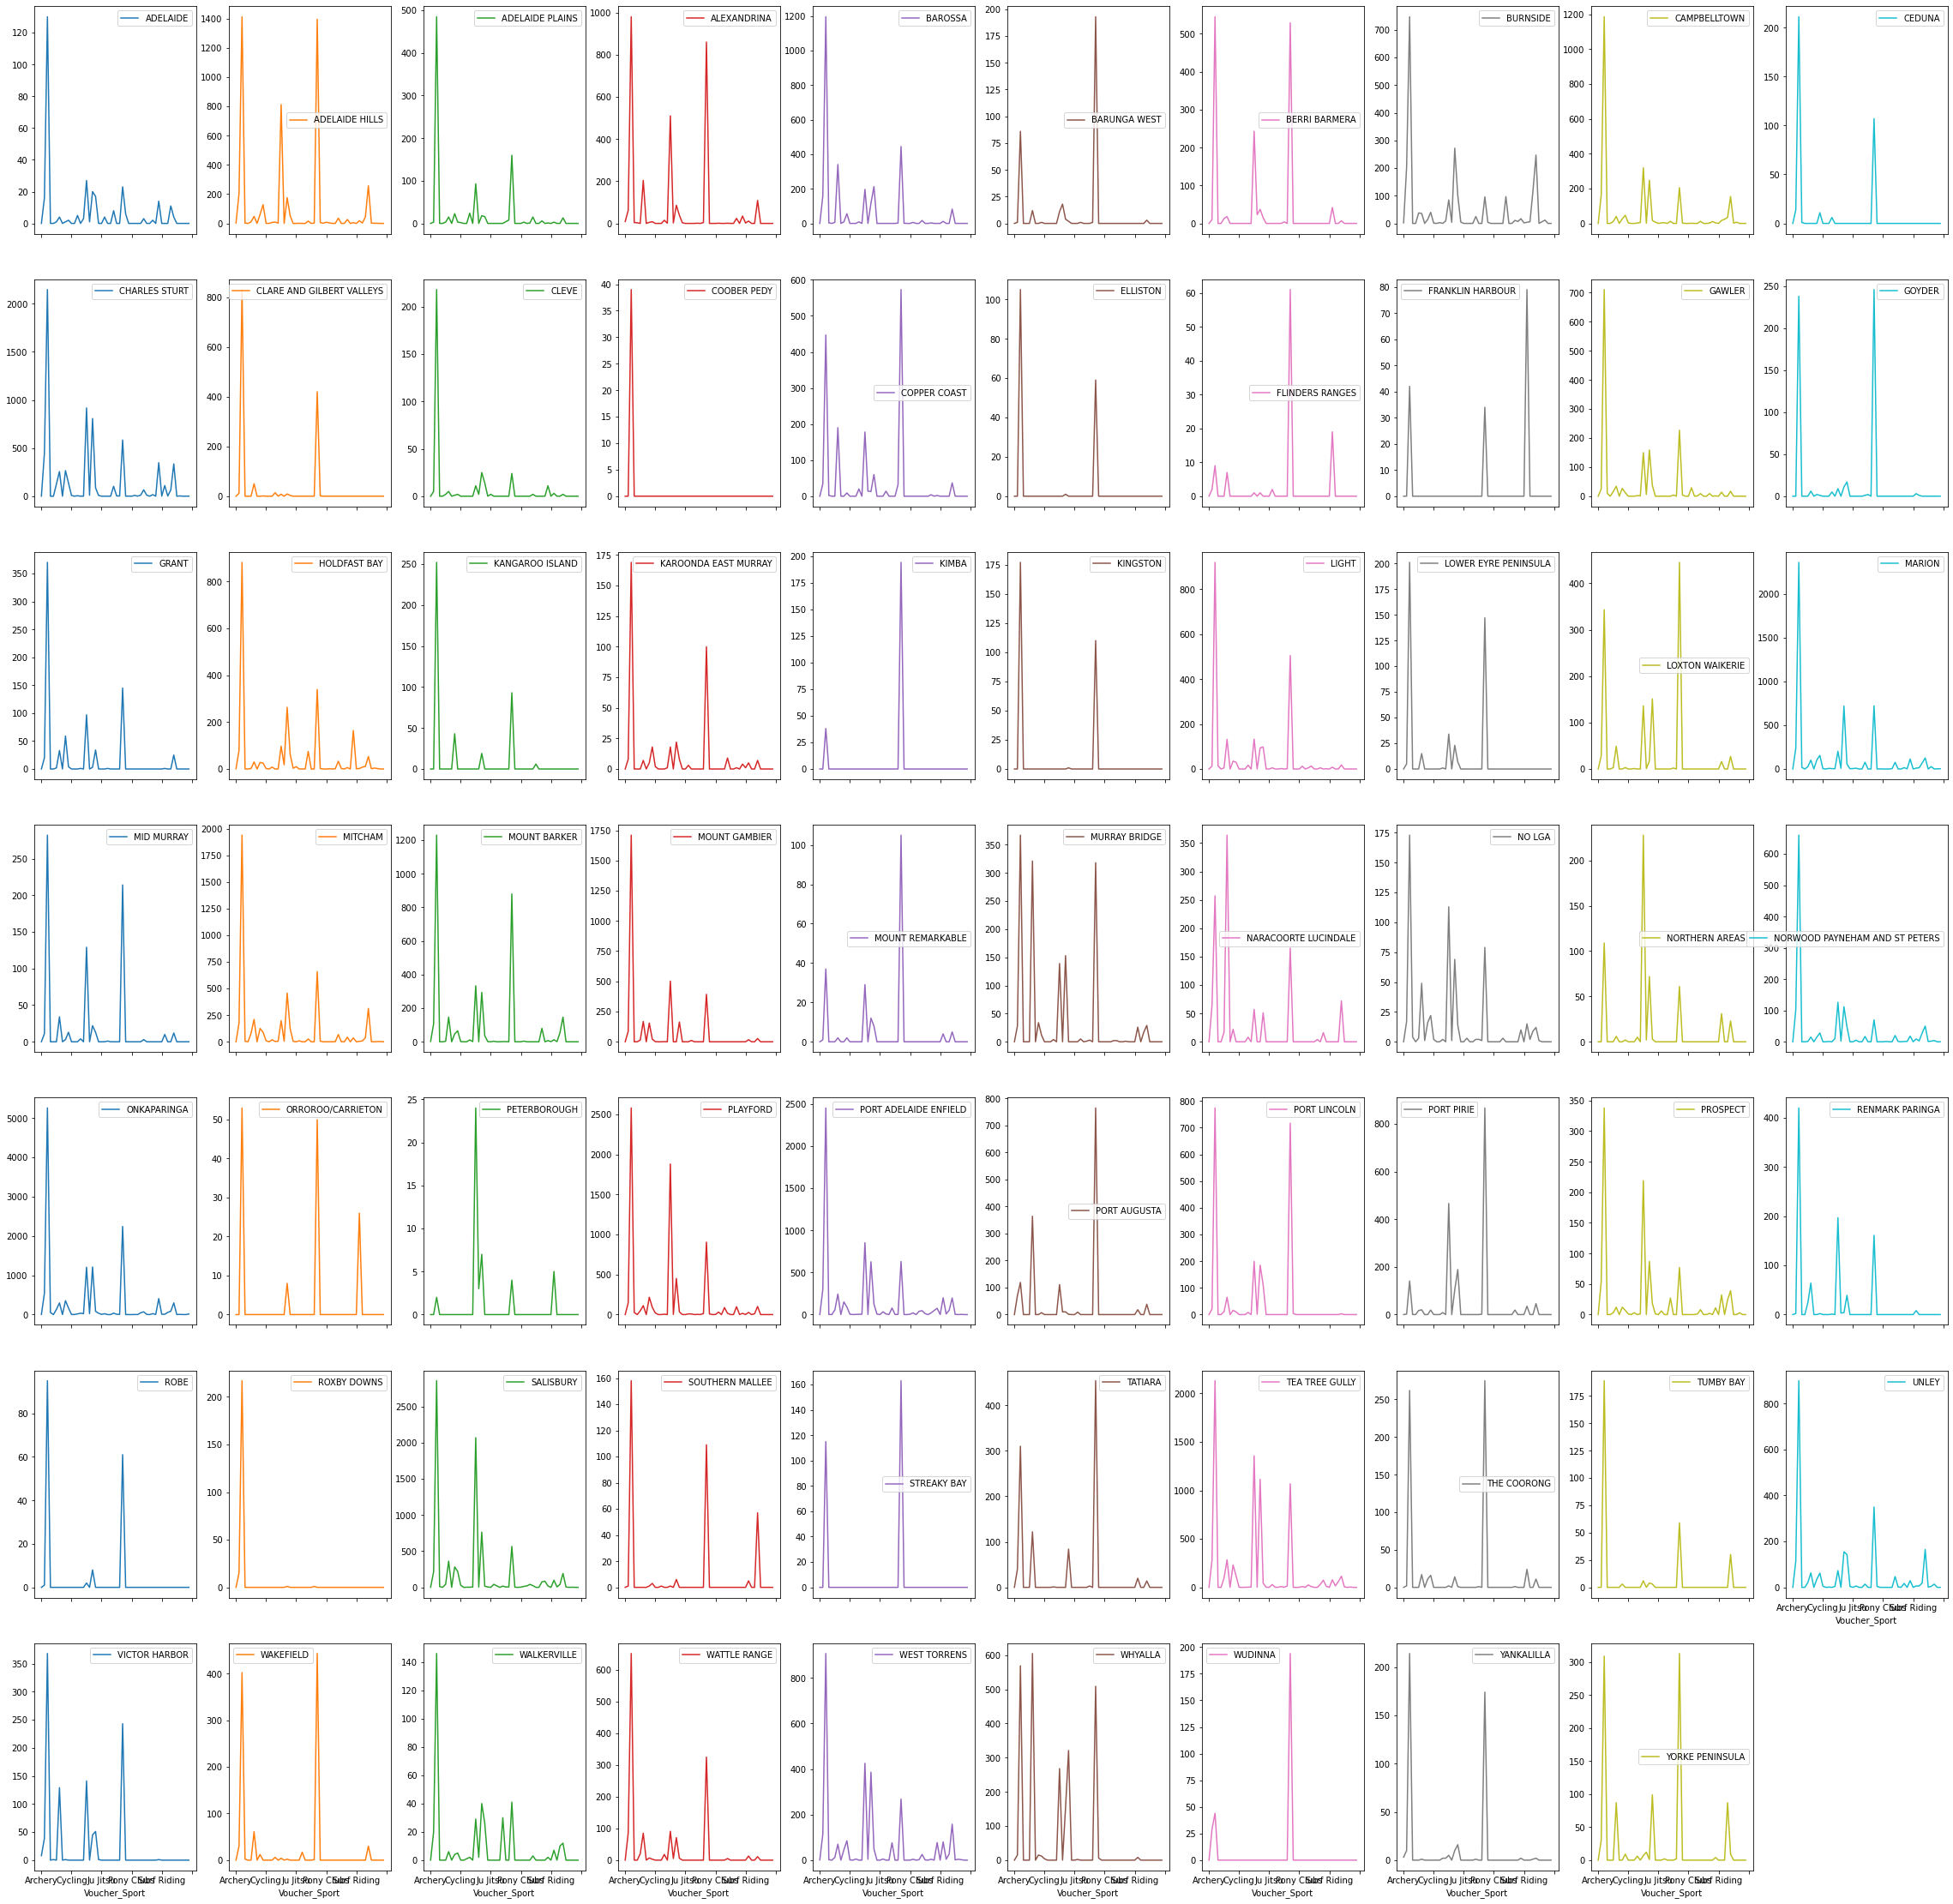

In [25]:
m.plot(kind='line',subplots=True, layout=(7,10),figsize=(40,40))

### -- There are very  different of popular sports in those Local governement areas  
### -- some of sports even zero participant 

## - ` Are any LGAs over/under represented in their use of vouchers? `

In [26]:
set(sa_vouchers_scores['Participant_ATSI_Indicator'])

{'ATSI', 'Not ATSI'}

In [27]:
sa_vouchers_scores['Club_Previous_Member'].describe()

count                    127526
unique                        2
top       Registered Previously
freq                      75713
Name: Club_Previous_Member, dtype: object

<AxesSubplot:xlabel='count', ylabel='Club_Previous_Member'>

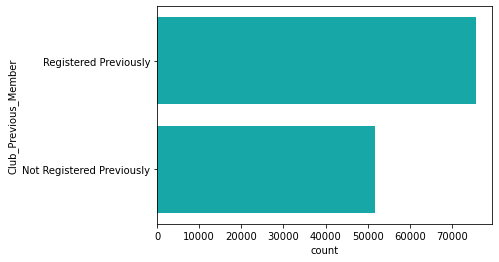

In [28]:
sns.countplot(y='Club_Previous_Member', data=sa_vouchers_scores, color="c")

In [29]:
print('The number of people registed previously but still get voucher:',len(sa_vouchers_scores[(sa_vouchers_scores['Club_Previous_Member']=='Registered Previously')&(sa_vouchers_scores['Voucher_Value']!=None)]))
print('The number of people Not registed previously and get voucher:',len(sa_vouchers_scores[(sa_vouchers_scores['Club_Previous_Member']!='Registered Previously')&(sa_vouchers_scores['Voucher_Value']!=None)]))


The number of people registed previously but still get voucher: 75713
The number of people Not registed previously and get voucher: 51813


In [97]:
over_ta=sa_vouchers_scores[(sa_vouchers_scores['Club_Previous_Member']=='Registered Previously')&(sa_vouchers_scores['Voucher_Value']!=None)]
print('Those LGA are over used vouchers because those rigested before:',set(over_ta['Participant_LGA']))

Those LGA are over used vouchers because those rigested before: {'HOLDFAST BAY', 'CAMPBELLTOWN', 'VICTOR HARBOR', 'LOWER EYRE PENINSULA', 'TEA TREE GULLY', 'MOUNT BARKER', 'NARACOORTE LUCINDALE', 'PROSPECT', 'RENMARK PARINGA', 'GOYDER', 'ROBE', 'MOUNT REMARKABLE', 'KANGAROO ISLAND', 'YORKE PENINSULA', 'BURNSIDE', 'ADELAIDE PLAINS', 'STREAKY BAY', 'WATTLE RANGE', 'PORT AUGUSTA', 'WEST TORRENS', 'GAWLER', 'ORROROO/CARRIETON', 'WHYALLA', 'TATIARA', 'WAKEFIELD', 'PORT PIRIE', 'ONKAPARINGA', 'MID MURRAY', 'THE COORONG', 'ADELAIDE', 'CHARLES STURT', 'ELLISTON', 'BERRI BARMERA', 'MURRAY BRIDGE', 'MARION', 'WALKERVILLE', 'FLINDERS RANGES', 'MITCHAM', 'CLEVE', 'ALEXANDRINA', 'SOUTHERN MALLEE', 'KIMBA', 'CLARE AND GILBERT VALLEYS', 'ADELAIDE HILLS', 'COOBER PEDY', 'GRANT', 'LIGHT', 'PLAYFORD', 'PETERBOROUGH', 'KAROONDA EAST MURRAY', 'YANKALILLA', 'LOXTON WAIKERIE', 'PORT ADELAIDE ENFIELD', 'WUDINNA', 'NORTHERN AREAS', 'BARUNGA WEST', 'CEDUNA', 'SALISBURY', 'PORT LINCOLN', 'KINGSTON', 'TUMBY BAY'

In [101]:
under_ta=sa_vouchers_scores[(sa_vouchers_scores['Club_Previous_Member']!='Registered Previously')&(sa_vouchers_scores['Voucher_Value']!=None)]
print('Those LGA are under used vouchers because those unrigested before:',set(under_ta['Participant_LGA']))

Those LGA are under used vouchers because those unrigested before: {'HOLDFAST BAY', 'CAMPBELLTOWN', 'VICTOR HARBOR', 'LOWER EYRE PENINSULA', 'TEA TREE GULLY', 'MOUNT BARKER', 'NARACOORTE LUCINDALE', 'RENMARK PARINGA', 'PROSPECT', 'ROBE', 'GOYDER', 'MOUNT REMARKABLE', 'KANGAROO ISLAND', 'YORKE PENINSULA', 'BURNSIDE', 'ADELAIDE PLAINS', 'STREAKY BAY', 'WATTLE RANGE', 'PORT AUGUSTA', 'WEST TORRENS', 'GAWLER', 'ORROROO/CARRIETON', 'WHYALLA', 'TATIARA', 'WAKEFIELD', 'PORT PIRIE', 'ONKAPARINGA', 'MID MURRAY', 'THE COORONG', 'ADELAIDE', 'CHARLES STURT', 'ELLISTON', 'BERRI BARMERA', 'MURRAY BRIDGE', 'MARION', 'WALKERVILLE', 'FLINDERS RANGES', 'MITCHAM', 'CLEVE', 'ALEXANDRINA', 'SOUTHERN MALLEE', 'KIMBA', 'CLARE AND GILBERT VALLEYS', 'ADELAIDE HILLS', 'COOBER PEDY', 'GRANT', 'LIGHT', 'PLAYFORD', 'PETERBOROUGH', 'LOXTON WAIKERIE', 'KAROONDA EAST MURRAY', 'YANKALILLA', 'PORT ADELAIDE ENFIELD', 'WUDINNA', 'NORTHERN AREAS', 'BARUNGA WEST', 'CEDUNA', 'SALISBURY', 'PORT LINCOLN', 'KINGSTON', 'TUMBY B

### --- In ONKAPARINGA they have higher number of sport vouchers participanted but the percentage of voucher used is not big which may consider to under used vouchers , compared to KAROONDA EAST MURRY where has low population but have higher percentage of voucher used which will be consider overused 

## `- Is there a relationship between any of the SEIFA measures and voucher use in an LGA?`

### -- There is no any relationship between SEIFA measures and voucher used in an LGA , however there are some relationship in those measures 

In [51]:
#create a new table with local govenment and other index
new_C=sa_vouchers_scores[['Participant_LGA','IEO','IER','IRSAD','IRSD','Voucher_Sport','Population']]


In [52]:
#new_C.groupby(['Participant_LGA'])
new_C['Voucher_used'] = new_C.groupby('Participant_LGA')['Participant_LGA'].transform('count')

<ipython-input-52-e7e335e1b3bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_C['Voucher_used'] = new_C.groupby('Participant_LGA')['Participant_LGA'].transform('count')


In [53]:
new_C

,Participant_LGA,IEO,IER,IRSAD,IRSD,Voucher_Sport,Population,Voucher_used
0,ONKAPARINGA,996.0,996.0,975.0,993.0,Australian Rules,159517.0,12782
1,ONKAPARINGA,996.0,996.0,975.0,993.0,Australian Rules,159517.0,12782
2,ONKAPARINGA,996.0,996.0,975.0,993.0,Gymnastics,159517.0,12782
3,ONKAPARINGA,996.0,996.0,975.0,993.0,Gymnastics,159517.0,12782
4,ONKAPARINGA,996.0,996.0,975.0,993.0,Gymnastics,159517.0,12782
...,...,...,...,...,...,...,...,...
127521,MID MURRAY,965.0,965.0,917.0,937.0,Netball,8134.0,751
127522,MID MURRAY,965.0,965.0,917.0,937.0,Netball,8134.0,751
127523,MID MURRAY,965.0,965.0,917.0,937.0,Netball,8134.0,751
127524,MID MURRAY,965.0,965.0,917.0,937.0,Netball,8134.0,751


In [54]:
new_C.corr()
# with the corelation values they have very low numbers between vocher used and those measures

,IEO,IER,IRSAD,IRSD,Population,Voucher_used
IEO,1.000000,1.000000,0.873014,0.908264,-0.090025,-0.002347
IER,1.000000,1.000000,0.873014,0.908264,-0.090025,-0.002347
IRSAD,0.873014,0.873014,1.000000,0.990590,-0.064540,-0.056601
IRSD,0.908264,0.908264,0.990590,1.000000,-0.067140,-0.042081
Population,-0.090025,-0.090025,-0.064540,-0.067140,1.000000,0.942472
Voucher_used,-0.002347,-0.002347,-0.056601,-0.042081,0.942472,1.000000


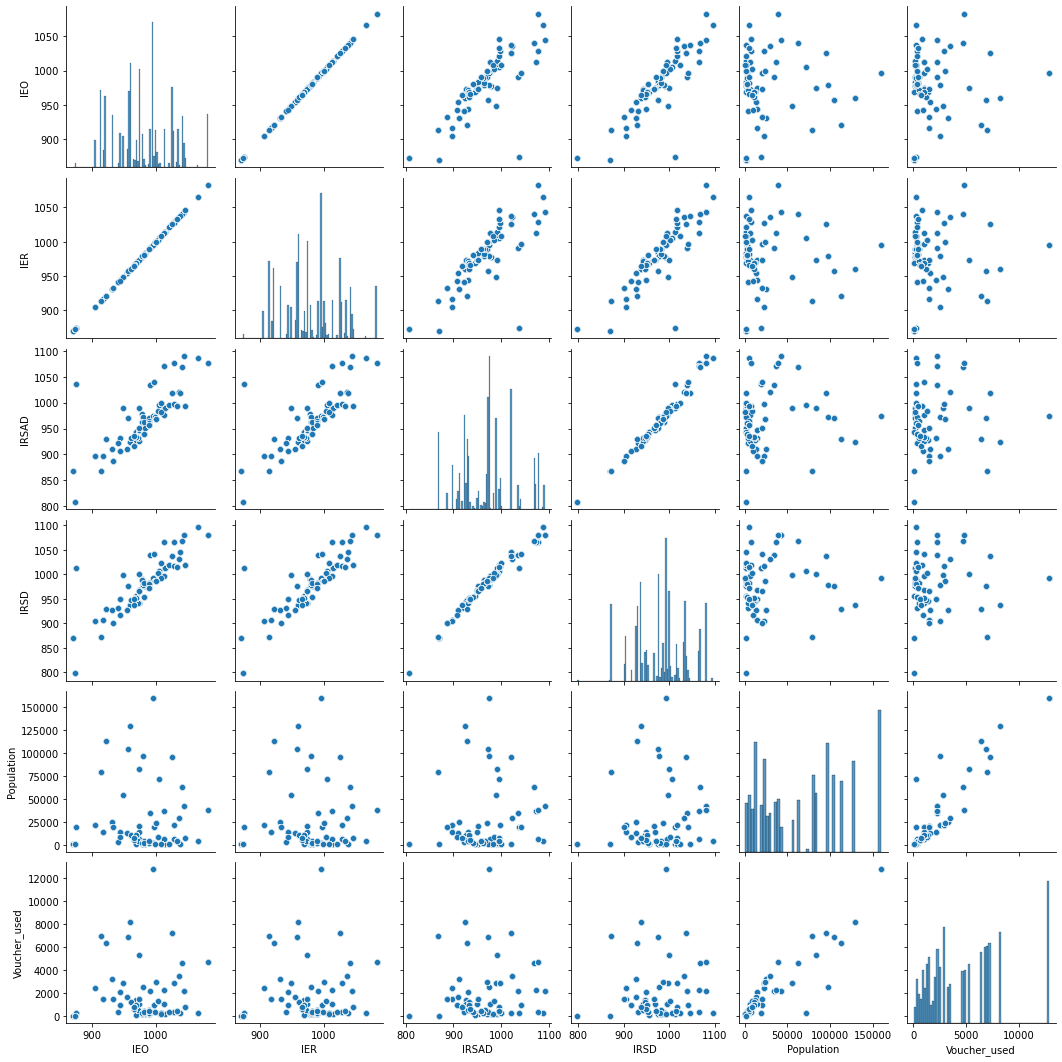

In [55]:
#put a pair plot to show relationships 
sns.pairplot(new_C)

### -- There is a strong positive linerar relationship between IEO and IER: when IEO higher then will be IER higher
### which means the higher people edcated the more their economic ratio will increased
### -- There is a strong positive linear relationship between IEO and IRSAD:when IEO higher then IRSAD will be higher,whaich means the more higher edcation rate the the more advantage of their ecomomic in this area 
### -- There is a strong positive linear relationship between IRSAD and IRSD: When IRSAD and IRSD will be higher, Relative Socio-economic Advantage and Disadvantage higer , the Socio-economic Disadvantageis also higher
### -- There is a strong positive linear relationship between IER and IRSAD: when IER higher then IRSAD will be higher,which means the higher edcation ratio the , the higher advantage of their economic
### --- the more popopulation the more vochers used 
### --- THE IRSD have strong positive relationship with IEO ,IEO,IRSAD

## Challenge - Queensland

_Note: this is an extra task that you might take on to get a better grade for your portfolio.  You can get a good pass grade without doing this._ 

Queensland has a similar program called [Get Started](https://data.gov.au/dataset/ds-qld-3118838a-d425-48fa-bfc9-bc615ddae44e/details?q=get%20started%20vouchers) and we can retrieve data from their program in a similar format.  

The file [round1-redeemed_get_started_vouchers.csv](files/round1-redeemed_get_started_vouchers.csv) contains records of the vouchers issued in Queensland. The date of this data is not included but the program started in 2015 so it is probably from around then.  

The data includes the LGA of the individual but the name of the activity is slightly different.  To do a comparable analysis you would need to map the activity names onto those from South Australia. 

In [37]:
qld_vouchers = pd.read_csv('round1-redeemed_get_started_vouchers.csv')
qld_vouchers.head()

,Application Number,Voucher Number,Child Age (at time of Application),Gender,Has your child played sport before?,Participation Activity,Club Name,Club Suburb/Town,Club Local Government Area Name,Club State Electoral District Name,Parent Suburb/Town,Total Payment
0,2000012253,Q89QDUXP,10,NaN,Yes,*Other,Queensland Police-Citizens Youth Welfare Assoc...,Airlie Beach,Whitsunday (R),Whitsunday,Jubilee Pocket,60.01
1,2000001727,593F6Y41,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Leichhardt,150.00
2,2000013464,PH2R4RTT,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Woodridge,150.00
3,2000009270,035SE2H5,5,NaN,Yes,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Yatala,150.00
4,2000007273,NP6C4729,6,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Alexandra Hills,150.00


In [38]:
# Join the QLD data with the LGA data as before to get population and SIEFA data integrated
qld_vouchers['LGA'] = qld_vouchers['Club Local Government Area Name'].str.replace(' \([RC]+\)', '').str.upper()
qld_vouchers_scores = qld_vouchers.join(LGA_scores, on='LGA')
qld_vouchers_scores.head()

<ipython-input-38-d688531e2bfc>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  qld_vouchers['LGA'] = qld_vouchers['Club Local Government Area Name'].str.replace(' \([RC]+\)', '').str.upper()


,Application Number,Voucher Number,Child Age (at time of Application),Gender,Has your child played sport before?,Participation Activity,Club Name,Club Suburb/Town,Club Local Government Area Name,Club State Electoral District Name,Parent Suburb/Town,Total Payment,LGA,IEO,IER,IRSAD,IRSD,Population
0,2000012253,Q89QDUXP,10,NaN,Yes,*Other,Queensland Police-Citizens Youth Welfare Assoc...,Airlie Beach,Whitsunday (R),Whitsunday,Jubilee Pocket,60.01,WHITSUNDAY,989.0,989.0,966.0,982.0,31393.0
1,2000001727,593F6Y41,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Leichhardt,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0
2,2000013464,PH2R4RTT,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Woodridge,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0
3,2000009270,035SE2H5,5,NaN,Yes,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Yatala,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0
4,2000007273,NP6C4729,6,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Alexandra Hills,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0


In [39]:
new_Q=qld_vouchers_scores[['LGA','Participation Activity','IEO','IER','IRSAD','IRSD','Population']]

In [40]:
new_Q['Voucher_used'] = new_Q.groupby('LGA')['LGA'].transform('count')

<ipython-input-40-444d99a47bd5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_Q['Voucher_used'] = new_Q.groupby('LGA')['LGA'].transform('count')


In [41]:
set(new_Q['Participation Activity'])

{'*Other',
 'Archery',
 'Athletics',
 'Australian Football',
 'BMX Bicycle Motocross',
 'Baseball',
 'Basketball',
 'Body Boarding',
 'Bowls Lawn',
 'Boxing',
 'Broomball',
 'Bushwalking',
 'Calisthenics',
 'Canoeing Outrigger',
 'Cheerleading',
 'Cricket',
 'Cycling',
 'Dancesport',
 'Disability Sports',
 'Dragon Boating',
 'Equestrian',
 'Football (Soccer)',
 'Futsal',
 'Golf',
 'Gymnastics',
 'Hockey',
 'Ice Hockey',
 'Ice Skating',
 'Inline Hockey',
 'Ju Jitsu',
 'Judo',
 'Karate',
 'Karting',
 'Kayaking',
 'Life Saving Surf',
 'Mixed Martial Arts',
 'Motor Cycling',
 'Netball',
 'Oztag',
 'Parkour',
 'Polocrosse',
 'Pony Club',
 'Riding for the Disabled',
 'Rock Climbing',
 'Roller Sports',
 'Rowing',
 'Rugby League',
 'Rugby Union',
 'Sailing',
 'Shooting',
 'Skipping',
 'Softball',
 'Squash',
 'Surfing',
 'Swimming',
 'Swimming Synchronised',
 'T-Ball',
 'Table Tennis',
 'Taekwondo',
 'Tennis',
 'Tenpin Bowling',
 'Touch',
 'Trail Bike Riding',
 'Trampolining',
 'Weightlifting',

In [42]:
set(new_Q['LGA'])

{'BANANA (S)',
 'BLACKALL TAMBO',
 'BRISBANE',
 'BUNDABERG',
 'BURDEKIN (S)',
 'CAIRNS',
 'CASSOWARY COAST',
 'CENTRAL HIGHLANDS',
 'CHARTERS TOWERS',
 'DOUGLAS (S)',
 'FLINDERS (S)',
 'FRASER COAST',
 'GLADSTONE',
 'GOLD COAST',
 'GYMPIE',
 'HERVEY BAY',
 'HINCHINBROOK (S)',
 'IPSWICH',
 'ISAAC',
 'LIVINGSTONE (S)',
 'LOCKYER VALLEY',
 'LOGAN',
 'LONGREACH',
 'MACKAY',
 'MARANOA',
 'MAREEBA (S)',
 'MCKINLAY (S)',
 'MORETON BAY',
 'MOUNT ISA',
 'MURWEH (S)',
 'NOOSA (S)',
 'NORTH BURNETT',
 'QUILPIE (S)',
 'REDLAND',
 'ROCKHAMPTON',
 'SCENIC RIM',
 'SOMERSET',
 'SOUTH BURNETT',
 'SOUTHERN DOWNS',
 'SUNSHINE COAST',
 'TABLELANDS',
 'TOOWOOMBA',
 'TOWNSVILLE',
 'WESTERN DOWNS',
 'WHITSUNDAY'}

In [43]:
new_Q.corr()

,IEO,IER,IRSAD,IRSD,Population,Voucher_used
IEO,1.000000,1.000000,0.803234,0.826937,0.448373,0.449206
IER,1.000000,1.000000,0.803234,0.826937,0.448373,0.449206
IRSAD,0.803234,0.803234,1.000000,0.994480,0.815237,0.707232
IRSD,0.826937,0.826937,0.994480,1.000000,0.768167,0.662767
Population,0.448373,0.448373,0.815237,0.768167,1.000000,0.755194
Voucher_used,0.449206,0.449206,0.707232,0.662767,0.755194,1.000000


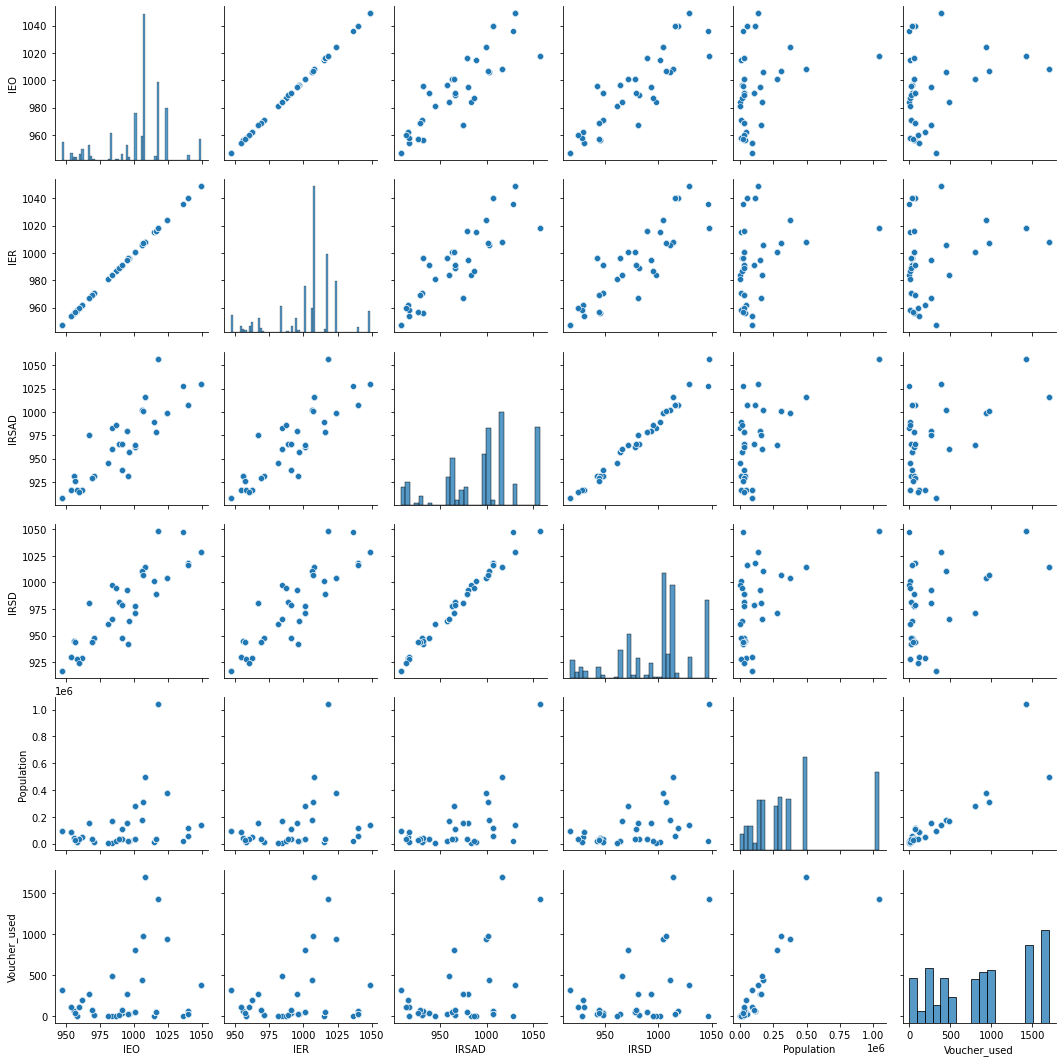

In [44]:
sns.pairplot(new_Q)

In [45]:
new_C['Voucher_used%']=(new_C['Voucher_used']/sa_vouchers_scores['Population'])*100
new_C

<ipython-input-45-75d138767bed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_C['Voucher_used%']=(new_C['Voucher_used']/sa_vouchers_scores['Population'])*100


,Participant_LGA,IEO,IER,IRSAD,IRSD,Voucher_Sport,Voucher_used,Voucher_used%
0,ONKAPARINGA,996.0,996.0,975.0,993.0,Australian Rules,12782,8.012939
1,ONKAPARINGA,996.0,996.0,975.0,993.0,Australian Rules,12782,8.012939
2,ONKAPARINGA,996.0,996.0,975.0,993.0,Gymnastics,12782,8.012939
3,ONKAPARINGA,996.0,996.0,975.0,993.0,Gymnastics,12782,8.012939
4,ONKAPARINGA,996.0,996.0,975.0,993.0,Gymnastics,12782,8.012939
...,...,...,...,...,...,...,...,...
127521,MID MURRAY,965.0,965.0,917.0,937.0,Netball,751,9.232850
127522,MID MURRAY,965.0,965.0,917.0,937.0,Netball,751,9.232850
127523,MID MURRAY,965.0,965.0,917.0,937.0,Netball,751,9.232850
127524,MID MURRAY,965.0,965.0,917.0,937.0,Netball,751,9.232850


In [46]:
new_Q['Voucher_used%']=(new_Q['Voucher_used']/new_Q['Population'])*100
new_Q

<ipython-input-46-6d70dd17fe9d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_Q['Voucher_used%']=(new_Q['Voucher_used']/new_Q['Population'])*100


,LGA,Participation Activity,IEO,IER,IRSAD,IRSD,Population,Voucher_used,Voucher_used%
0,WHITSUNDAY,*Other,989.0,989.0,966.0,982.0,31393.0,18,0.057338
1,BRISBANE,*Other,1018.0,1018.0,1057.0,1048.0,1042074.0,1425,0.136747
2,BRISBANE,*Other,1018.0,1018.0,1057.0,1048.0,1042074.0,1425,0.136747
3,BRISBANE,*Other,1018.0,1018.0,1057.0,1048.0,1042074.0,1425,0.136747
4,BRISBANE,*Other,1018.0,1018.0,1057.0,1048.0,1042074.0,1425,0.136747
...,...,...,...,...,...,...,...,...,...
9502,FRASER COAST,Zen Do Kai Martial Arts,947.0,947.0,908.0,917.0,95348.0,320,0.335613
9503,FRASER COAST,Zen Do Kai Martial Arts,947.0,947.0,908.0,917.0,95348.0,320,0.335613
9504,FRASER COAST,Zen Do Kai Martial Arts,947.0,947.0,908.0,917.0,95348.0,320,0.335613
9505,FRASER COAST,Zen Do Kai Martial Arts,947.0,947.0,908.0,917.0,95348.0,320,0.335613


Text(0.5, 1.0, 'Queensland Activity on population rate')

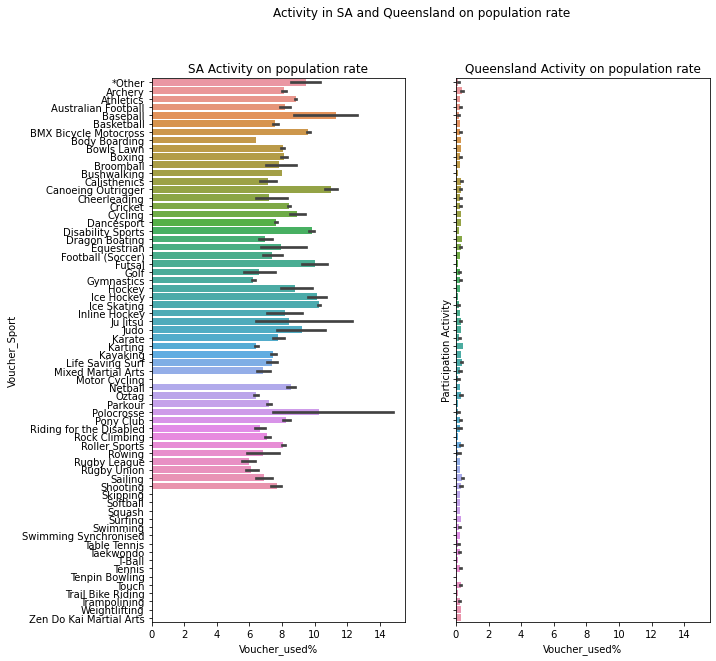

In [47]:
#crate the bars shows types of sports participanted and numbers 
fig, axes = plt.subplots(1, 2, sharey=True,sharex=True,figsize=(10,10))
fig.suptitle('Activity in SA and Queensland on population rate')
sns.barplot(ax=axes[0],data=new_C,x='Voucher_used%',y='Voucher_Sport')
axes[0].set_title('SA Activity on population rate')
sns.barplot(ax=axes[1],data=new_Q,x='Voucher_used%', y='Participation Activity')
axes[1].set_title('Queensland Activity on population rate')


Text(0.5, 1.0, 'Queensland Activity')

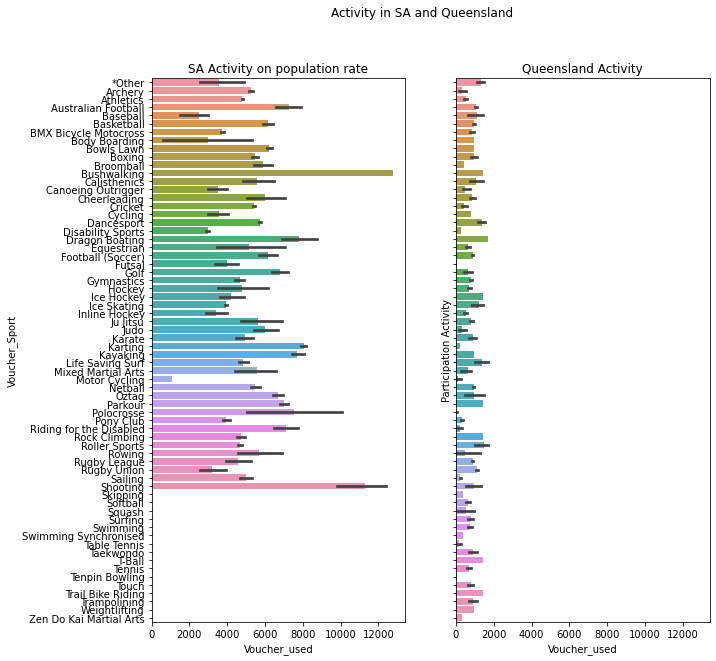

In [48]:
# since with use the same x , the number of Voucher used  of queensland is quite smaller than southern australian in each LGA, especially when it compared based on the population on each LGA
# that i decided to use the number of clamined voucher to compare each other 
fig, axes = plt.subplots(1, 2, sharey=True,sharex=True,figsize=(10,10))
fig.suptitle('Activity in SA and Queensland')
sns.barplot(ax=axes[0],data=new_C,x='Voucher_used',y='Voucher_Sport')
axes[0].set_title('SA Activity on population rate')
sns.barplot(ax=axes[1],data=new_Q,x='Voucher_used', y='Participation Activity')
axes[1].set_title('Queensland Activity')


In [120]:
# compare the population to each part of Areasnew_Q['Population']
print('the number of total population in Queensland is :',new_Q.Population.mean())
print('the number of avergage population in SA is :',new_chart['Population'].mean())

the number of total population in Queensland is : 398072.2556742323
the number of avergage population in SA is : 68014.2960462792


### --- we can see compare to SouthernAustralia ,that queensland not quit a fun to participants those sport
### ---skipping , softball, surfing , swimming , swimming sychronised , table tannis , laekwondo , t_ball, tennis , ltenpin bowling , touch , trail bike riding , trampoling , weightfiting and zen do kai martial arts, those sports that non involved in SA but popular in Queensland
### --- Queensland have a larger larger number of average of each LGA , but they have lower number of participants in this program compared to SA , Which may shows SA more intersted in sports 
### --- people in Queensland are more interested the sports with 'water' or related to beach and sea 